In [10]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.typing as npt

NRO_EXP = 10000

In [11]:
def lancar_dado(d: int = 6, lancamentos: int = 1):
    return np.random.randint(1, d + 1, size=lancamentos)


CARA = 1
COROA = 0


def lancar_moedas(lancamentos: int = 1) -> npt.ArrayLike:
    return np.random.choice([0, 1], size=lancamentos)

Plote um gráfico de T por N, onde T é o tempo médio que demora para conseguirmos pelo
menos N caras consecutivas em uma sequência de lançamentos consecutivos de moedas.


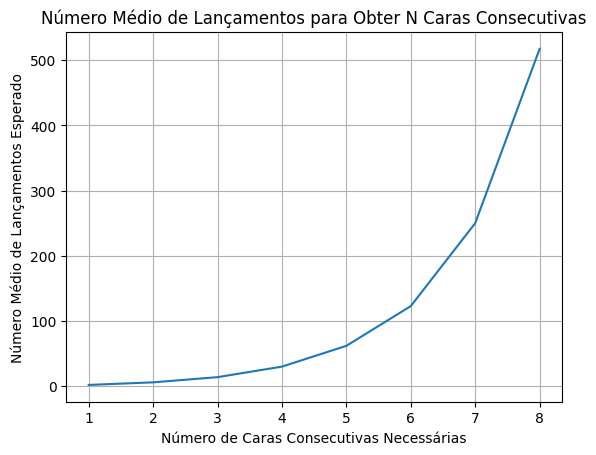

In [6]:
lancamentos = 8
carasConsecutivas = np.arange(1, lancamentos + 1)  # Cria um array de 1 a n
tempoMedio = []

for cara_consecutiva_que_estou_testando in carasConsecutivas:
    lancamentosAteSucesso = []
    for i in range(NRO_EXP):
        lancamentos = 0
        carasConsecutivasAtual = 0
        while carasConsecutivasAtual < cara_consecutiva_que_estou_testando:
            lancamento = lancar_moedas(1)
            if np.random.choice([0, 1]) == CARA:
                carasConsecutivasAtual += 1
            else:
                carasConsecutivasAtual = 0
            lancamentos += 1
        lancamentosAteSucesso.append(lancamentos)
    tempoMedio.append(np.mean(lancamentosAteSucesso))

plt.plot(carasConsecutivas, tempoMedio)
plt.xlabel("Número de Caras Consecutivas Necessárias")
plt.ylabel("Número Médio de Lançamentos Esperado")
plt.title("Número Médio de Lançamentos para Obter N Caras Consecutivas")
plt.grid(True)
plt.show()

No jogo Dungeons & Dragons, quando um jogador ataca um monstro, ele deve rolar um
dado de 20 lados (chamado de d20). a) Uma habilidade chamada “Vantagem” permite que o
jogador jogue 2 dados d20 e escolha o melhor resultado. Na média, quão melhor é uma
rolagem usando “Vantagem” do que uma rolagem comum (de apenas um dado)? b) Suponha
que um ataque como descrito acima acerta o monstro se o resultado obtido na rolagem for
maior ou igual que a defesa do monstro (D). Em outras palavras, um ataque é bem sucedido se
e somente se d20 >= D. Plote 2 gráficos de A por D, onde A é a porcentagem de ataques
bem-sucedidos e D é o valor de defesa do monstro variando de 1 a 20, uma linha
representando o ataque sem Vantagem e outra com Vantagem (veja exemplo abaixo). c) Você
diria que a importância da habilidade “Vantagem” muda conforme D aumenta?


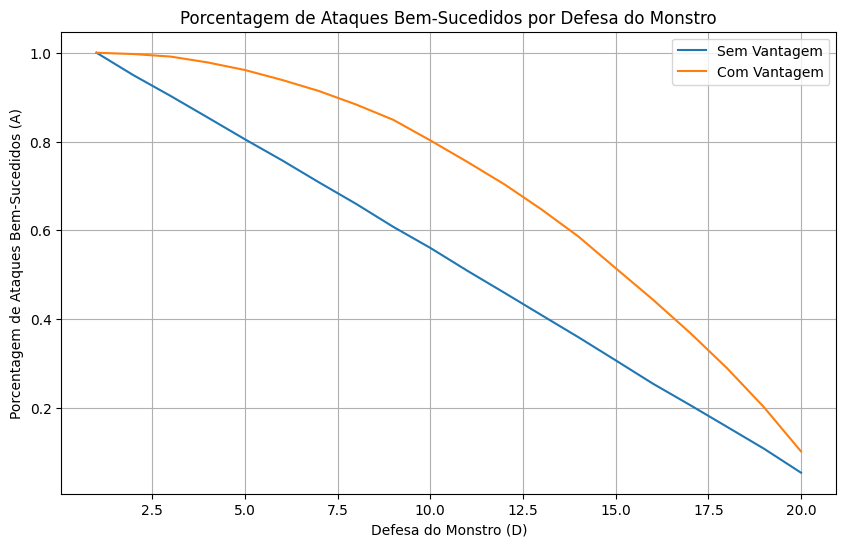

In [14]:
dado = 20

# Gera todos os lançamentos de uma vez
defesas = np.arange(1, dado + 1)

ataques_sem_vantagem = np.random.randint(low=1, high=dado + 1, size=NRO_EXP)
ataques_com_vantagem = np.max(
    np.random.randint(low=1, high=dado + 1, size=(2, NRO_EXP)), axis=0
)

porcentagens_sem_vantagem = [
    (ataques_sem_vantagem >= D).mean() for D in defesas]
porcentagens_com_vantagem = [
    (ataques_com_vantagem >= D).mean() for D in defesas]

plt.figure(figsize=(10, 6))
plt.plot(defesas, porcentagens_sem_vantagem, label="Sem Vantagem")
plt.plot(defesas, porcentagens_com_vantagem, label="Com Vantagem")
plt.xlabel("Defesa do Monstro (D)")
plt.ylabel("Porcentagem de Ataques Bem-Sucedidos (A)")
plt.title("Porcentagem de Ataques Bem-Sucedidos por Defesa do Monstro")
plt.legend()
plt.grid(True)
plt.show()

Suponha que você tem N moedas. Você lança todas elas aleatoriamente e elas saem como
cara ou coroa. Então, você seleciona apenas as que saíram como coroa e as lança
novamente. Depois do lançamento, você seleciona as que saíram coroa e repete o processo
até que todas saiam como cara. Simule o número esperado de lançamentos em função de N.


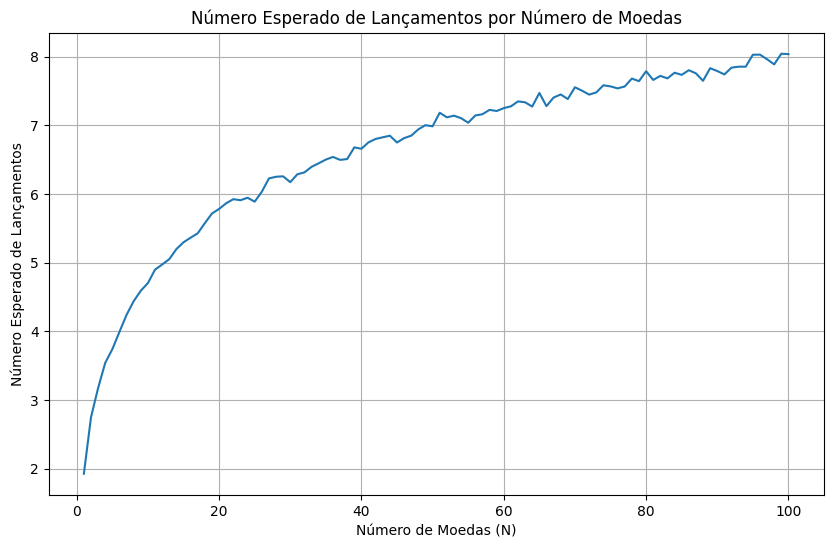

In [15]:
def experimento(nro_moedas: int) -> int:
    coroas = np.sum(lancar_moedas(nro_moedas))
    if coroas == 0:
        return 1
    else:
        return 1 + experimento(coroas)


N = np.arange(1, 101)
repeticoes = 1000
medias = []

for nro_moedas in N:
    resultados = [experimento(nro_moedas) for _ in range(repeticoes)]
    medias.append(np.mean(resultados))

plt.figure(figsize=(10, 6))
plt.plot(N, medias)
plt.xlabel("Número de Moedas (N)")
plt.ylabel("Número Esperado de Lançamentos")
plt.title("Número Esperado de Lançamentos por Número de Moedas")
plt.grid(True)
plt.show()

Mostre por simulação o curioso resultado de que, para um par de filhos A e B, a
probabilidade de que ambos sejam do sexo masculino dado que um deles é do sexo masculino
não é 50%.


In [16]:
import numpy as np


FEMININO = 0
MASCULINO = 1
filhos = np.random.choice([FEMININO, MASCULINO], size=(NRO_EXP, 2))

# Seleciona os pares onde pelo menos um filho é do sexo masculino
pelo_menos_um_masculino = filhos[np.any(filhos == MASCULINO, axis=1)]

# Calcula a proporção de pares onde ambos os filhos são do sexo masculino
ambos_masculinos = np.mean(
    np.all(pelo_menos_um_masculino == MASCULINO, axis=1))

print(
    f"A probabilidade de que ambos sejam do sexo masculino, dado que um deles é do sexo masculino, é {ambos_masculinos * 100:.2f}%."
)

A probabilidade de que ambos sejam do sexo masculino, dado que um deles é do sexo masculino, é 32.73%.


Uma questão interessante em teoria de probabilidade é o problema do aniversário, que
versa sobre a probabilidade de 2 pessoas de um grupo fazerem aniversário em um mesmo dia
do ano. a) Plote um gráfico de P por N simulando a probabilidade P de 2 pessoas quaisquer fizeram aniversário no mesmo dia em um grupo de N pessoas. b) Plote o mesmo gráfico para 3
pessoas.


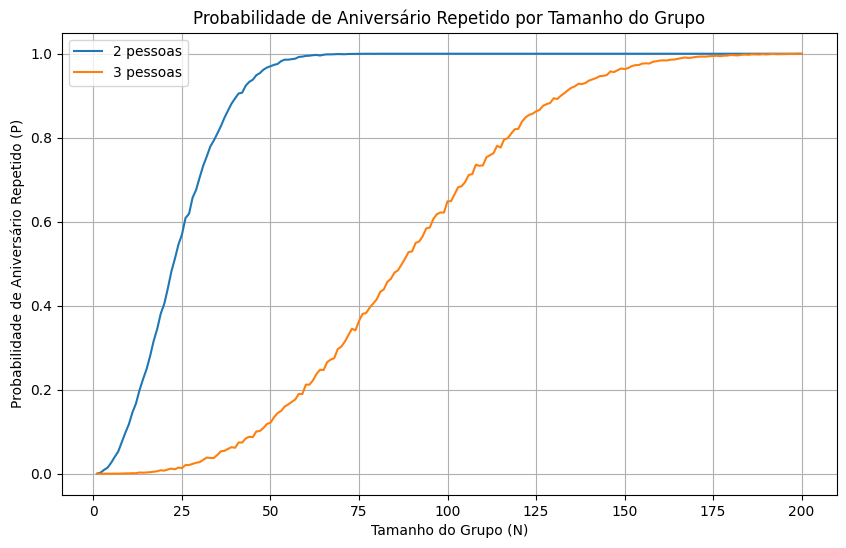

In [19]:
import numpy as np
import matplotlib.pyplot as plt


# Tamanhos de grupos a serem simulados
tamanhos_grupos = np.arange(1, 201)

# Probabilidades para 2 e 3 pessoas
probabilidades_2 = []
probabilidades_3 = []

for tamanho_grupo in tamanhos_grupos:
    aniversarios_repetidos_2 = 0
    aniversarios_repetidos_3 = 0
    for _ in range(NRO_EXP):
        # Gera aniversários aleatórios para o grupo
        aniversarios = np.random.choice(365, tamanho_grupo)
        # Conta quantos aniversários são repetidos
        _, contagens = np.unique(aniversarios, return_counts=True)
        # Verifica se há algum aniversário repetido
        if np.any(contagens >= 2):
            aniversarios_repetidos_2 += 1
        if np.any(contagens >= 3):
            aniversarios_repetidos_3 += 1
    # Calcula as probabilidades
    probabilidades_2.append(aniversarios_repetidos_2 / NRO_EXP)
    probabilidades_3.append(aniversarios_repetidos_3 / NRO_EXP)

# Plota os resultados
plt.figure(figsize=(10, 6))
plt.plot(tamanhos_grupos, probabilidades_2, label="2 pessoas")
plt.plot(tamanhos_grupos, probabilidades_3, label="3 pessoas")
plt.xlabel("Tamanho do Grupo (N)")
plt.ylabel("Probabilidade de Aniversário Repetido (P)")
plt.title("Probabilidade de Aniversário Repetido por Tamanho do Grupo")
plt.legend()
plt.grid(True)
plt.show()

Assuma que um bêbado está abraçado a um poste no ponto de coordenada (0,0). Considere
que o bêbado decide ir para casa, mas em seu estado inebriado ele caminha 1 metro em em
uma direção aleatória a cada passo. a) Plote o histograma do número de passos que o bêbado
leva para alcançar uma distância maior que 5 metros em relação ao poste. b) Plote um gráfico
D por N, mostrando a distância média D que o bêbado está do poste após N passos.


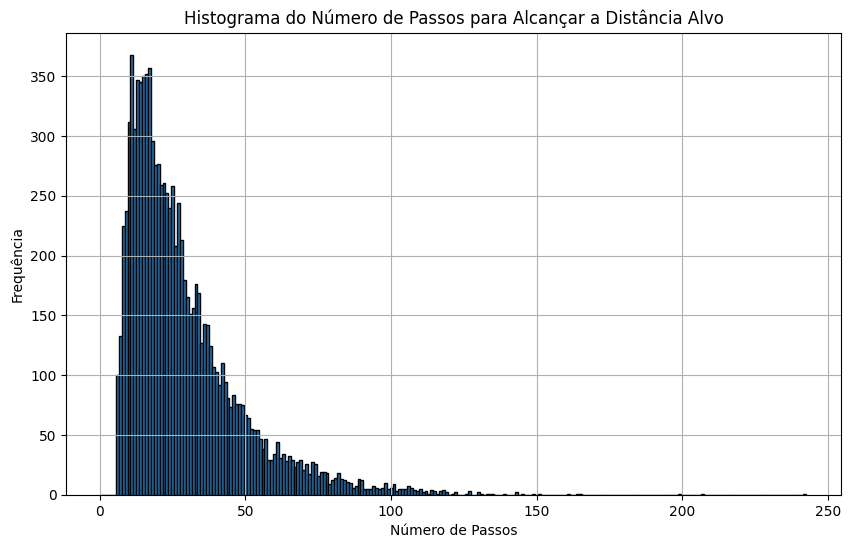

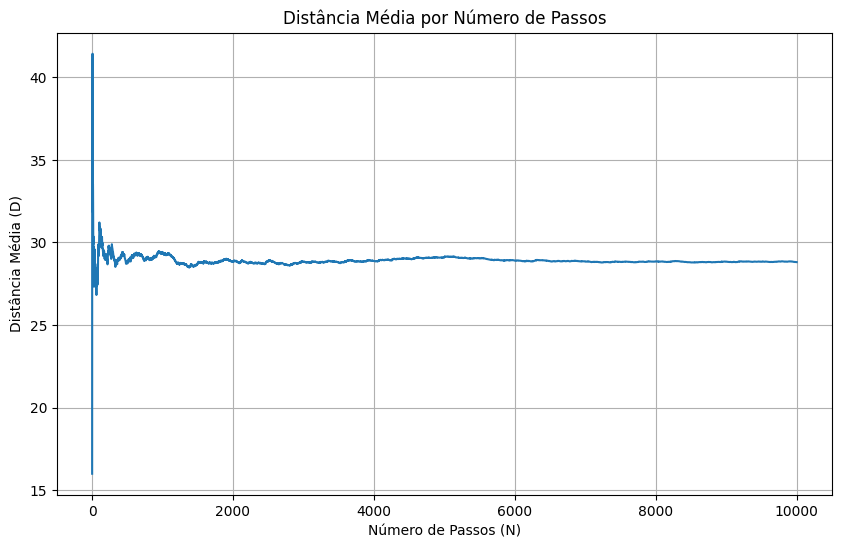

In [20]:
max_passos = 1000
distancia_alvo = 5
num_passos = []
distancias_medias = []


def distancia_percorrida_a_partir_da_origem(x: int, y: int) -> float:
    return np.hypot(x, y)


def walk(x: int, y: int) -> tuple:
    angulo = np.random.uniform(0, 2 * np.pi)
    x += np.cos(angulo)
    y += np.sin(angulo)
    return x, y


for _ in range(NRO_EXP):
    x, y = 0, 0
    for passos in range(1, max_passos + 1):
        x, y = walk(x, y)
        if distancia_percorrida_a_partir_da_origem(x, y) >= distancia_alvo:
            num_passos.append(passos)
            break
    if len(num_passos) > len(distancias_medias):
        distancias_medias.append(np.mean(num_passos))

plt.figure(figsize=(10, 6))
plt.hist(
    num_passos, bins=range(1, max(num_passos) + 2), edgecolor="black", align="left"
)
plt.xlabel("Número de Passos")
plt.ylabel("Frequência")
plt.title("Histograma do Número de Passos para Alcançar a Distância Alvo")
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(distancias_medias) + 1), distancias_medias)
plt.xlabel("Número de Passos (N)")
plt.ylabel("Distância Média (D)")
plt.title("Distância Média por Número de Passos")
plt.grid(True)
plt.show()

A figura do final da lista mostra a América do Sul como um grafo de adjacências de países.
Suponha um processo markoviano em que, a cada passo, um turista viaja de um país para
outro do grafo. A cada passo, o turista sai do país atual e tem probabilidade igual de escolher
qualquer um dos países adjacentes como destino.

a) Qual a probabilidade de, após um número grande de passos, o turista estar no Brasil?

b) Quantos passos em média o turista precisa dar para visitar pelo menos uma vez cada país do grafo?

c) Qual a probabilidade de um turista que está agora no Brasil estar ainda no Brasil daqui 2, 3 ou 4 passos?

d) Qual a probabilidade queem uma caminhada de 10 passos começando no Brasil o turista não visite o Chile?


In [21]:
import numpy as np

latin_america = {
    "Brasil": [
        "Argentina",
        "Bolívia",
        "Colômbia",
        "Guiana",
        "Paraguai",
        "Peru",
        "Suriname",
        "Uruguai",
        "Venezuela",
    ],
    "Argentina": ["Bolívia", "Brasil", "Chile", "Paraguai", "Uruguai"],
    "Bolívia": ["Argentina", "Brasil", "Chile", "Paraguai", "Peru"],
    "Chile": ["Argentina", "Bolívia", "Peru"],
    "Colômbia": ["Brasil", "Equador", "Peru", "Venezuela"],
    "Equador": ["Colômbia", "Peru"],
    "Guiana": ["Brasil", "Suriname", "Venezuela"],
    "Paraguai": ["Argentina", "Bolívia", "Brasil"],
    "Peru": ["Bolívia", "Brasil", "Chile", "Colômbia", "Equador"],
    "Suriname": ["Brasil", "Guiana"],
    "Uruguai": ["Argentina", "Brasil"],
    "Venezuela": ["Brasil", "Colômbia", "Guiana"],
}

countries = list(latin_america.keys())


def proximo_pais(pais_atual, grafo):
    return np.random.choice(grafo[pais_atual])


def a(pais_inicial="Brasil", numero_viagens=1000):
    pais_atual = pais_inicial
    for _ in range(numero_viagens):
        pais_atual = proximo_pais(pais_atual, latin_america)
    return pais_atual


NRO_EXP = 10000
paises_destino = np.empty(NRO_EXP, dtype=object)

for i in range(NRO_EXP):
    pais_inicial = np.random.choice(countries)
    paises_destino[i] = a(pais_inicial)

vezes_que_terminou_no_brasil = np.sum(paises_destino == "Brasil")
probabilidade_de_voltar_ao_brasil = vezes_que_terminou_no_brasil / NRO_EXP
print(
    f"A probabilidade de voltar ao Brasil após 1000 viagens é de {probabilidade_de_voltar_ao_brasil * 100:.2f}%."
)

A probabilidade de voltar ao Brasil após 1000 viagens é de 19.97%.


No jogo banco imobiliário, você joga 2d6 (obtendo um resultado de 2 a 12) e anda esse
número de espaços ao redor do tabuleiro (veja por exemplo a imagem do tabuleiro no final
desta lista). Os espaços com retângulos coloridos representam propriedades imobiliárias
(ignore os efeitos dos outros espaços). a) Considerando que uma partida de Banco Imobiliário
demora um tempo tendendo a infinito (como qualquer pessoa que já jogou Banco Imobiliário
pode confirmar), qual a probabilidade de cairmos em cada propriedade após um número muito
grande de jogadas? b) Considerando agora que ao parar no espaço do canto superior direito
do tabuleiro (“vá para a prisão”), o jogador é transportado para o espaço inferior esquerdo
(“prisão”), simule novamente as probabilidades. c) Considerando que as melhores
propriedades imobiliárias são aquelas onde os jogadores param com frequência, qual você
diria que é a melhor cor de propriedades no tabuleiro?


a) Os times de futebol Vermelho FC e Azul FC jogam uma partida. Suponha que os times
marcam gols de forma independente seguindo processos de Poisson com taxas de chegada λv
= 2/partida e λa = 3/partida. Qual a taxa de partidas que podemos esperar que o time Vermelho
FC ganha?

b) Resolva o mesmo exercício para os times de basquete RedCats e BlueDogs,
assumindo taxas de chegada de pontos de λr = 100/partida e λb = 150/partida, respondendo
quantas vezes podemos esperar que o time RedCats ganha.

c) Compare os resultados e explique

In [22]:
Lambda = int

V: Lambda = 2
A: Lambda = 3
R: Lambda = 100
B: Lambda = 150

gols_vermelho = np.random.poisson(V, NRO_EXP)
gols_azul = np.random.poisson(A, NRO_EXP)

vitorias_vermelho_fc = np.mean(gols_vermelho > gols_azul)

pontos_redcats = np.random.poisson(R, NRO_EXP)
pontos_bluedogs = np.random.poisson(B, NRO_EXP)
vitorias_redcats = np.mean(pontos_redcats > pontos_bluedogs)

print(
    f"A taxa de partidas que podemos esperar que o time Vermelho FC ganha é {vitorias_vermelho_fc:.2f}."
)
print(
    f"A taxa de partidas que podemos esperar que o time RedCats ganha é {vitorias_redcats:.2f}."
)

A taxa de partidas que podemos esperar que o time Vermelho FC ganha é 0.25.
A taxa de partidas que podemos esperar que o time RedCats ganha é 0.00.
